<h1>제10장 그래프</h1>
<br/>그래프는 컴퓨터 사이언스에서 풀고자하는 많은 문제들을 표현하는 데 매우 유용하다. 

<h2> 1.  그래프를 테이블로 표현하기</h2>
<br/>강의노트에서 취급한 다음의  테이블을 그래프로 표현하는 방법을 알아 본다.
<br/>


![table2](table2.png)

### 먼저, 데이터를 테이블 형식으로 표현하고자 할 때, 유용한 라이브러리 패키지로 '[pandas](https://pandas.pydata.org/)' 가 있다. 

'pandas' 는 1차원 데이터 표현으로 'Series', 2차원 데이터 표현으로 'Dataframe' 이라는 자료구조를 제공하며, 'Dataframe'을 시각적으로 표현한다면 테이블 형식으로 확인할 수 있다. 
<br/>
<br/><b>아래 예제를 통해 'Dataframe'을 표현해보자.</b>

In [1]:
from pandas import DataFrame

distance = {'B':  [0, 0, 245, 115, 145, 175],
           'E':  [0, 0, 450, 645, 0, 0],
           'F' : [245, 450, 0, 220, 385, 0],
           'L': [115, 645, 220, 0, 260, 125], 
           'N': [145, 0, 385, 260, 0, 320], 
           'S': [175, 0, 0, 125, 320, 0]
            }
cities = ['Barstow', 'Eureka', 'Fresno', 'Los Angeles', 'Needles' , 'San Diego']
cal_cit_dis = DataFrame(distance, columns=['B', 'E', 'F', 'L', 'N', 'S'], index=cities)
cal_cit_dis

,B,E,F,L,N,S
Barstow,0,0,245,115,145,175
Eureka,0,0,450,645,0,0
Fresno,245,450,0,220,385,0
Los Angeles,115,645,220,0,260,125
Needles,145,0,385,260,0,320
San Diego,175,0,0,125,320,0


<br/>
<h2>2. 그래표 표현 </h2>
<br/><b>상기 테이블로 표현되는 데이터를 다음 그림과 같이 그래표로 표현할 수 있다.</b>
<br/>


![graph](graph.png)

<h4>우선 위 그래프에서 에지 거리를 모두 1로 가정해보고 살펴보기로 한다.</h4>


![graph_no](graph_no.png)

위 [그림2]의 그래프를 표현하는 방법으로는 <b>adjacency list, adjacency matrix </b>등이 있다. 본 실습에서는 <b>adjacency list</b>를 사용하며, 파이썬에서는 <b>dictionary</b> 로 표현한다. 

In [2]:
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }
graph

{'S': ['B', 'L', 'N'],
 'B': ['F', 'L', 'N', 'S'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'N']}

<b>위 'graph' 자료구조는 키(key)가 그래프의 노드(vertex) 인 dictionary이다.</b>
<br/>각 키에 대해 해당 값은 이 노드에서 직접 에지로 연결된 노드를 포함하는 목록이다. 

<br/>
<h2>3. 경로 찾기</h2>
<br/>다음으로 두 노드 사이의 경로(path)를 찾는 알고리즘을 구해보자. 본 실습에서는 경로가 사이클은 포함하지 않는 것으로 한다. (즉, 경로에서 동일한 노드가 두 번 이상 들어가지 않는 것으로 한다.). 따라서 경로(path)에 대해서는 교재에서 배운 정의에 더하여 사이클을 포함하지 않도록 한 다음의 정의를 사용한다. 
<br/><h3>Definition : 
Let $n$ be a nonnegative integer and $G$ an undirected graph.  A path of length $n$ from $u$ to $v$ in $G$ is a sequence of $n$ edges $e_1, … , e_n $ of $G$ for which there exists a sequence   $x_0 = u, x_1, …, x_{n-1}, x_n = v $  of vertices such that 1) for   $i,j=0,1 …, n ~~$and  $i \neq j, x_{i} \neq  x_{j} $  and 2) $e_i$ has $x_{i-1}$ and $x_i$. </h3>



<br/>
<b>먼저, Connected Graph 에서 주어진 시작 노드와 종단 노드 간의 경로를 하나를 찾는 알고리즘을 파이썬 프로그래밍 한다.</b>
<br/>
<br/>알고리즘은 파이썬 함수로 구현되며, 그래프와 시작 노드, 종단 노드, 경로를 인수로 취하며, 경로를 구성하는 노드 목록 리스트(시작 및 종단 노드 포함)를 반환한다. 경로를 찾을 수 없으면 'None'을 반환한다. 경로에서는 동일한 노드가 두 번 이상 들어가지 않는 것으로 한다 (즉, 사이클은 포함하지 않음). 

In [6]:
def find_path(graph, start, end, path=[]):
        path = path + [start]
        
        if start == end:
            return path
        if not start in graph :
            return None
        for node in graph[start]:
            for comp1 in node:
                if comp1 not in path:
                    #print(comp1)
                    newpath = find_path(graph, comp1, end, path)
                    if newpath: 
                        return newpath
        return None 

In [7]:
find_path(graph, 'S', 'F')

['S', 'B', 'F']

<b>상기 경로 찾기 알고리즘은 상기 dictionary 구조로 표현되는 adjacency list 에서 처음으로 찾은 경로 하나를 반환한다. </b>

###  다음은 주어진 시작 노드와 종단 노드간의 모든 경로를 찾는 알고리즘이다. 

In [8]:
def find_all_paths(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if not start in graph :
            return []
        all_paths = []
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    all_paths.append(newpath)
        return all_paths

In [9]:
find_all_paths(graph, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'L', 'F']]

## 4. 최단 경로 찾기 
### 다음은 상기 [그림 2]에서 각 에지의 거리(weight)가 1 일때, 최단 경로를 찾는 알고리즘이다.

In [10]:
def find_shortest_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if not start in graph:
            return None
        shortest = None

        for node in graph[start]:
            if node not in path:
                newpath = find_shortest_path(graph, node, end, path)
                if newpath:
                    if not shortest or len(newpath) < len(shortest):
                        shortest = newpath
        return shortest

In [11]:
find_shortest_path(graph, 'S', 'F')

['S', 'B', 'F']

### 상기 알고리즘에서 최단 경로가 여러 개가 있더라도 처음 찾아지는 최단 경로를 복귀한다. 

In [12]:
def find_shortest_path2(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if not start in graph:
            return None
        shortest = None

        for node in graph[start]:
            if node not in path:
                newpath = find_shortest_path2(graph, node, end, path)
                if newpath:
                    if not shortest or len(newpath) <= len(shortest): # <  ==> <=  로 변경
                        shortest = newpath
        return shortest

In [13]:
find_shortest_path2(graph, 'S', 'F')

['S', 'N', 'F']

<br/>
<h4>이제, [그림 1]과 같이 에지에 다양한 거리(weight)를 갖는 그래프에서 경로 찾는 문제의 경우에서, 자료 구조 표현 및 알고리즘 등을 살펴보기로 한다.</h4>

### 다음과 같이 상기 adjacency list 에 에지 거리(weigth)를 추가한 변형 adjacency list 를 고려해보자.

In [14]:
graph2 = {'S': [['B', 175], ['L', 125],['N', 320]],
             'B': [['F', 245], ['L', 115], ['N', 145], ['S', 175]],
             'L': [['B', 115], ['E', 645],['F', 220],['N', 260],['S', 125]],
             'N': [['B', 145], ['F', 385],['L', 260],['S', 320]],
             'E': [['F', 450],['L', 645]],
             'F': [['B', 245], ['E', 450],['N', 385]]}


[그림 1]의 그래프를 상기 weighted adjacency list 로 표현한 경우에, 경로 찾기 알고리즘은 다음과 같이 표현 자료구조에 따라 <b>약간의 변형</b>이 필요하다. 

In [15]:
def find_path2(graph, start, end, path=[]):
        path = path + [start]
        
        if start == end:
            return path
        if not start in graph:
            return None
        for node in graph[start]:
            if node[0] not in path:
                newpath = find_path2(graph, node[0], end, path)
                if newpath: return newpath
        return None 


In [16]:
find_path2(graph2, 'S', 'F')

['S', 'B', 'F']

### [그림 1]경우에, 시작노드에서 종단노드까지의 모든 경로를 찾아보자. 

In [17]:
def find_all_paths2(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]        
        if not start in graph:
            return []  
        
        all_paths = []
        for node in graph[start]:
            if node[0] not in path:        
                newpaths = find_all_paths2(graph, node[0], end, path)
                for newpath in newpaths:
                    all_paths.append(newpath)
        return all_paths

In [18]:
find_all_paths2(graph2, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'L', 'F']]

### 다음은 [그림 1]에서  최단 경로와 그 때의 최단 경로 길이를 찾는 알고리즘이다.

In [19]:
from math import *
def find_shortest_path2(graph, start, end, path=[], distance=0):
        path = path+ [start]            
        if start == end:
            return path, distance
        if not start in graph:
            return None, inf
        
        shortest_path = None
        shortest_path_distance = inf

        for node in graph[start]:
            if node[0] not in path:                
                distance= distance+node[1]   
                
                new_path, new_path_distance = find_shortest_path2(graph, node[0], end, path, distance)
                distance=distance-node[1]
                if new_path:
                    if not shortest_path or new_path_distance < shortest_path_distance:
                        shortest_path = new_path
                        shortest_path_distance = new_path_distance
        return shortest_path, shortest_path_distance

In [20]:
find_shortest_path2(graph2, 'S', 'F')

(['S', 'L', 'F'], 345)

In [21]:
find_shortest_path2(graph2, 'N', 'E')

(['N', 'F', 'E'], 835)

<br/>

## 5. 'networkx'  패키지를 활용한 그래프 문제 풀기 

### Graph 다루는 파이선 패키지로 'networkx' (https://networkx.github.io/) 가 있다.   

'networkx' 패키지 활용 참고 자료 : http://pythonkr.github.io/pyconkr-2014/pdf/pyconkr-2014-07_networkx.pdf

<b>이를 이용하여 그래프 문제를 풀어 보자. </b>

In [22]:
import networkx as nx # networkx 패키지 임포트

In [23]:
G=nx.Graph()
Nodes=['S', 'B', 'L', 'N', 'E', 'F' ]
G.add_nodes_from(Nodes)

# adding a list of edges:
G.add_edges_from([('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), 
                   ('N', 'F'), ('E', 'F') ])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['S', 'B', 'L', 'N', 'E', 'F']
Edges of graph: 
[('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), ('N', 'F'), ('E', 'F')]


In [24]:
import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


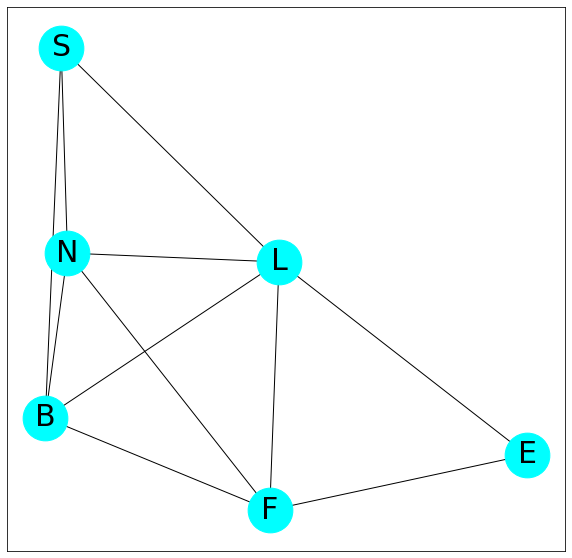

In [25]:
plt.figure(figsize=(10, 10))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos, font_size=30)
plt.show()

'S' 노드와 연결되어 있는 노드는 아래 코드로 찾을 수 있다.

In [26]:
print(G['S'])

{'L': {}, 'B': {}, 'N': {}}



</br><h3>위 그래프에서 거리(weight)를 추가한 그래프를 새로 만들어본다.</h3>

In [27]:
G2=nx.Graph()
Nodes=['S', 'B', 'L', 'N', 'E', 'F' ]
G2.add_nodes_from(Nodes)
G2.add_weighted_edges_from([('S', 'L', 125), ('S', 'B', 175 ), ('S', 'N', 320), ('B', 'F', 245), ('B', 'L', 115), ('B', 'N', 145), ('L', 'E', 645), ('L', 'F', 220), ('L', 'N', 260), ('N', 'F', 385), ('E', 'F', 450) ])
print("Nodes of graph: ")
print(G2.nodes())
print("Weighted Edges of graph: ")
print(G2.edges())

Nodes of graph: 
['S', 'B', 'L', 'N', 'E', 'F']
Weighted Edges of graph: 
[('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), ('N', 'F'), ('E', 'F')]


이제 'S' 노드와 연결되어 있는 노드를 출력하면 거리값도 같이 출력됨을 알 수 있다.

In [28]:
print(G2['S'])

{'L': {'weight': 125}, 'B': {'weight': 175}, 'N': {'weight': 320}}


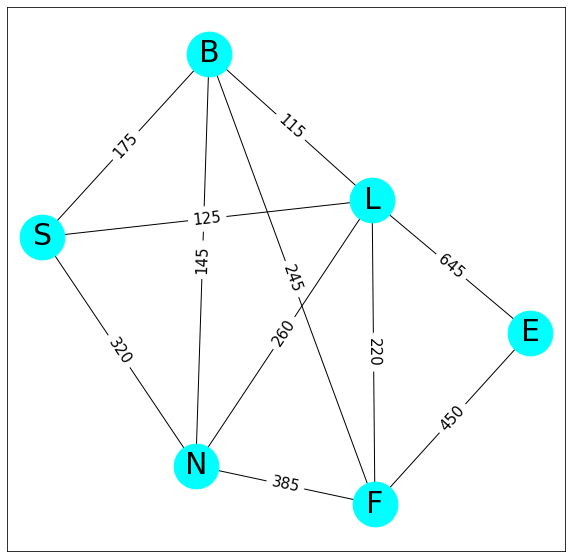

In [29]:
plt.figure(figsize=(10, 10))
pos=nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(G2, pos=pos)
nx.draw_networkx_labels(G2, pos=pos, font_size=30)
edge_labels = {(u, v): d['weight'] for u, v, d in G2.edges(data=True)}
nx.draw_networkx_edge_labels(G2, pos=pos, edge_labels=edge_labels, font_size=15)
plt.show()

In [30]:
nx.shortest_path(G2, "S", "F", "weight")

['S', 'L', 'F']

In [31]:
nx.shortest_path_length(G2, "S", "F", "weight")

345

<br/><br/><br/><br/>
<h1> 실습 문제 </h1>


<h2> 실습 1, 2, 3.</h2> 
<h3>다음과 같은 그래프가 주어진다고 하자.</h3>

![Exercise](exer.png)

<br/><h3>실습 1.</h3>
<br/>"networkx'  파이썬 패키지를 사용하여 해당 그래프를 그리시오. 단, 아래 pos 변수를 이용하여 출력 예시와 <b>반드시</b> 동일하게 출력해야 한다.

In [32]:
# 그래프 위치에 관한 dictionary. 
# https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html
A,B,C,D,E,F,G,H,I = 'ABCDEFGHI'
pos = {A:(1, 2),B:(3, 2),C:(4, 1),D:(3, 0),E:(1, 0),F:(0, 1),G:(2, 1.5),H:(3, 1),I:(1, 1)}

<출력 예시>

![prob0](prob0.png)

<br/>※ 풀이조건
<ol>
    <li>그래프를 그릴 때 크기 및 색상은 자유롭게 하되, 각 노드 및 엣지를 '알아볼 수 있도록' 그린다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>pos 변수를 사용하여 각 노드 및 엣지의 위치는 위 출력 예시와 동일하게 출력되어야 한다. 안 되었을 시 0.5점 감점한다.</li>
</ol>


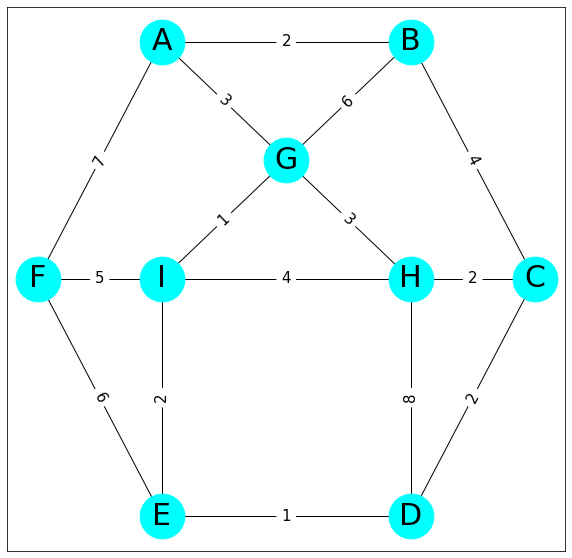

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
Gm=nx.Graph()
Nodes=['A','B','C','D','E','F','G','H','I']
Gm.add_nodes_from(Nodes)
Gm.add_weighted_edges_from([('A', 'B',2), ('A', 'G',3), ('A', 'F',7), ('B', 'C',4), ('B', 'G',6), ('C', 'H',2), ('C', 'D',2), 
                           ('D','H',8), ('D', 'E',1), ('E', 'I',2), ('E', 'F',6), ('F', 'I',5),('G','I',1),('G','H',3),('H','I',4) ])
A,B,C,D,E,F,G,H,I = 'ABCDEFGHI'
plt.figure(figsize=(10, 10))
pos=nx.spring_layout(Gm)
pos= {A:(1, 2),B:(3, 2),C:(4, 1),D:(3, 0),E:(1, 0),F:(0, 1),G:(2, 1.5),H:(3, 1),I:(1, 1)}
nx.draw_networkx_nodes(Gm, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(Gm, pos=pos)
nx.draw_networkx_labels(Gm, pos=pos, font_size=30)
edge_labels = {(u, v): d['weight'] for u, v, d in Gm.edges(data=True)}
nx.draw_networkx_edge_labels(Gm, pos=pos, edge_labels=edge_labels, font_size=15)
plt.show()

<br/><h3>실습 2.</h3>
<br/>"networkx' 파이썬 패키지를 사용하여 위에서 그린 그래프에서 노드 F 에서 노드 B, C, D, H, G 까지의 최단 경로와 최단 거리를 <b>각각</b> 구하여 출력하시오. 단, 아래 출력 예시에 맞게 출력해야 한다.

<출력 예시>
<br/>노드 F에서 노드 E까지 최단 경로는 ['F', 'E'] 이며 최단 거리는 6 이다.

※ 풀이조건
<ol>
    <li>"networkx' 파이썬 패키지 내 함수 및 클래스를 사용하여 시작 노드를 F로, 도착 노드를 B, C, D, H, G 중 하나씩 설정해서 총 5개의 최단 경로와 최단 거리를 구하여 출력한다. (예: (F-B), (F-C), (F-D), (F-H), (F-G) 로, 총 5개)</li>
    <li>최단 경로가 2개 이상일 경우 아무 것이나 1개를 택하여 출력한다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>5개 경로 및 거리가 모두 올바른 값이면 정답 처리 한다.</li>
    <li>다른 패키지 함수를 이용하여 간단히 구현해도 정답처리한다. 단 실습 3의 답과 동일하게 구현하면 0점 처리한다.</li>
</ol>


In [34]:
for i in ['B','C','D','H','G']:
    print('노드 F에서 노드 E까지 최단 경로는 ',nx.shortest_path(Gm, "F", i, "weight"),' 이며 최단 거리는 ',nx.shortest_path_length(Gm, "F", i, "weight"),' 이다.')

노드 F에서 노드 E까지 최단 경로는  ['F', 'A', 'B']  이며 최단 거리는  9  이다.
노드 F에서 노드 E까지 최단 경로는  ['F', 'E', 'D', 'C']  이며 최단 거리는  9  이다.
노드 F에서 노드 E까지 최단 경로는  ['F', 'E', 'D']  이며 최단 거리는  7  이다.
노드 F에서 노드 E까지 최단 경로는  ['F', 'I', 'H']  이며 최단 거리는  9  이다.
노드 F에서 노드 E까지 최단 경로는  ['F', 'I', 'G']  이며 최단 거리는  6  이다.


<br/><h3>실습 3.</h3>
<br/>"networkx' 파이썬 패키지를 사용하지 말고, 노드 F 에서 각 노드 B, C, D, H, G 까지의 최단 경로와 최단 거리를 구하는 파이썬 프로그래밍을 해보시오.


※ 풀이조건
<ol>
    <li><b>직접 프로그래밍을 하여</b> 시작 노드를 F로, 도착 노드를 B, C, D, H, G 중 하나씩 설정해서 총 5개의 최단 경로와 최단 거리를 구하여 출력한다.(예: (F-B), (F-C), (F-D), (F-H), (F-G) 로, 총 5개)</li>
    <li>최단 경로가 2개 이상일 경우 아무 것이나 1개를 택하여 출력한다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>5개 경로 및 거리가 모두 올바른 값이면 정답 처리 한다.</li>
    <li>코드 내 import 문을 사용할 경우 0점 처리한다. <b>위 실습 코드 중 'from math import *'을 그대로 사용하지 않도록 주의한다.</b></li>
</ol>


In [35]:
graph = {'A': [['B', 2], ['F', 7],['G', 3]],
             'B': [['B', 2],['C', 4], ['G', 6]],
             'C': [['B', 4], ['D', 2],['H', 2]],
             'D': [['C', 2], ['E', 1],['H', 8]],
             'E': [['D', 1],['F', 6],['I', 5]],
             'F': [['A', 7], ['E', 6],['I', 5]],
             'G': [['A', 3], ['B', 6],['H', 3],['I', 1]],
             'H': [['C', 2], ['D', 8],['G', 3],['I', 4]],
             'I': [['E', 2], ['F', 5],['G', 1],['H', 4]]
        }

Gm.add_weighted_edges_from([('A', 'B', 2), ('A', 'F', 7 ), ('A', 'G', 3), ('B', 'C', 4), ('B', 'G', 6), 
                            ('C', 'D', 2), ('C', 'H', 2), ('D', 'E', 1), ('D', 'H', 8), ('E', 'F', 6), 
                            ('E', 'I', 2), ('F', 'I', 5), ('G', 'H', 3), ('G', 'I', 1), ('H', 'I', 4)])

def find_shortest_path2(graph, start, end, path=[], distance=0):
        path = path + [start]            
        if start == end:
            return path, distance
        if not start in graph:
            return None, 10000000
        
        shortest_path=None
        shortest_path_distance= 10000000
        
        
        for node in graph[start]:
            if node[0] not in path:                
                distance= distance+node[1]   
                
                new_path, new_path_distance = find_shortest_path2(graph, node[0], end, path, distance)
                distance=distance-node[1]
                if new_path:
                    if not shortest_path or new_path_distance < shortest_path_distance:
                        shortest_path = new_path
                        shortest_path_distance = new_path_distance
        return shortest_path, shortest_path_distance
for end in "BCDHG":
    print("노드 F에서 노드",end,"까지 최단 경로는",find_shortest_path2(graph,'F',end)[0],"이며 최단 거리는",find_shortest_path2(graph,'F',end)[1],"이다.")

노드 F에서 노드 B 까지 최단 경로는 ['F', 'A', 'B'] 이며 최단 거리는 9 이다.
노드 F에서 노드 C 까지 최단 경로는 ['F', 'E', 'D', 'C'] 이며 최단 거리는 9 이다.
노드 F에서 노드 D 까지 최단 경로는 ['F', 'E', 'D'] 이며 최단 거리는 7 이다.
노드 F에서 노드 H 까지 최단 경로는 ['F', 'I', 'G', 'H'] 이며 최단 거리는 9 이다.
노드 F에서 노드 G 까지 최단 경로는 ['F', 'I', 'G'] 이며 최단 거리는 6 이다.


<br/><h3>실습 4.</h3>
<br/>그래프 이론을 공부했던 이산이는 문득 지금까지 배웠던 최단 거리 말고 최장 거리를 구하려면 어떻게 해야하는 지 궁금했다,
<br/>이를 위해 이산이는 반 친구들의 이름을 빌려 아래처럼 그래프를 그려보았다.

<b>노드 정보</b>
<br/>'노리', '새롬', '나래', '하은', '시내', '아름', '푸름', '마루', '하랑', '진운', '영현', '이산'

<b>엣지(거리) 정보</b>
<br/>[('나래', '영현', 1), ('하은', '하랑', 8), ('하랑', '진운', 1), ('시내', '마루', 7), ('나래', '진운', 2), ('푸름', '하랑', 5), ('새롬', '영현', 7), ('새롬', '시내', 8), ('노리', '아름', 3), ('나래', '하은', 9), ('하은', '아름', 3), ('나래', '마루', 4), ('시내', '푸름', 6), ('하은', '시내', 3), ('노리', '시내', 4), ('푸름', '진운', 7), ('아름', '푸름', 2), ('새롬', '하랑', 7), ('푸름', '영현', 0),
 ('아름', '마루', 6), ('노리', '이산', 7), ('새롬', '나래', 1), ('하은', '마루', 10), ('나래', '아름', 1), ('아름', '이산', 10), ('노리', '하랑', 8), ('영현', '이산', 2), ('시내', '하랑', 6), ('노리', '새롬', 9), ('노리', '마루', 4), ('마루', '이산', 8), ('새롬', '푸름', 9), ('새롬', '하은', 8), ('아름', '하랑', 8), ('나래', '시내', 7), ('새롬', '마루', 3), ('노리', '진운', 4), ('아름', '영현', 9),
 ('노리', '푸름', 5), ('시내', '진운', 1), ('새롬', '이산', 3), ('나래', '이산', 4), ('시내', '이산', 4), ('하은', '이산', 10)]

![prob4](prob4.png)

<br/>위 그래프에서 각 노드 간 엣지는 친구 관계를 나타내며 거리 값은 친밀도를 나타낸다. (높을수록 서로 더 친밀하다)
<br/>이산이는 최대 2명의 친구를 거쳐 새로운 친구를 소개받고 싶다고 했을 때 서로 서로 매우 친한 사이였으면 좋겠다고 생각했다.
<br/>현재 이산이와 친구 관계를 맺지 않은 반 친구들을 찾고 어떤 친구에게 소개를 받아야 하는 지 파이썬 프로그래밍을 통해 구하시오.

하은이에게 진운이를 소개할 경우 출력 예시는 아래와 같다.
<br/><b>"하은에게 진운을 소개하려면 ['새롬', '푸름'] 를 거쳐야 한다. 이때 친밀도(거리값)는 24 으로 가장 높다."</b>

※ 풀이조건
<ol>
    <li>시작 노드를 '이산'으로, 도착 노드들을 '이산과 친구 관계가 아닌' 노드로 하고 각 도착 노드에 대해 어떤 친구를 거쳐 소개를 받아야 하는 지 출력한다.</li>
    <li><b>최대 2명</b>의 친구를 거쳐야 하며, 친구 관계가 아닌 친구를 거쳐서 소개를 받을 수 없다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>이산이와 친구 관계가 아닌 친구들을 찾을 때 반드시 프로그래밍을 통해 찾을 필요는 없다.</li>
    <li>2명보다 많은 친구들을 거칠 경우 0.5점 감점한다.</li>
    <li>기타 제한은 없다.(라이브러리 자유롭게 사용)</li>
</ol>


In [36]:
import networkx as nx

Gn=nx.Graph()
Nodes=['노리', '새롬', '나래', '하은', '시내', '아름', '푸름', '마루', '하랑', '진운', '영현', '이산']
Gn.add_nodes_from(Nodes)
Gn.add_weighted_edges_from([('나래', '영현', 1), ('하은', '하랑', 8), ('하랑', '진운', 1), ('시내', '마루', 7), ('나래', '진운', 2), ('푸름', '하랑', 5), ('새롬', '영현', 7), ('새롬', '시내', 8), ('노리', '아름', 3), ('나래', '하은', 9), ('하은', '아름', 3), ('나래', '마루', 4), ('시내', '푸름', 6), ('하은', '시내', 3), ('노리', '시내', 4), ('푸름', '진운', 7), ('아름', '푸름', 2), ('새롬', '하랑', 7), ('푸름', '영현', 0), ('아름', '마루', 6), ('노리', '이산', 7), ('새롬', '나래', 1), ('하은', '마루', 10), ('나래', '아름', 1), ('아름', '이산', 10), ('노리', '하랑', 8), ('영현', '이산', 2), ('시내', '하랑', 6), ('노리', '새롬', 9), ('노리', '마루', 4), ('마루', '이산', 8), ('새롬', '푸름', 9), ('새롬', '하은', 8), ('아름', '하랑', 8), ('나래', '시내', 7), ('새롬', '마루', 3), ('노리', '진운', 4), ('아름', '영현', 9), ('노리', '푸름', 5), ('시내', '진운', 1), ('새롬', '이산', 3), ('나래', '이산', 4), ('시내', '이산', 4), ('하은', '이산', 10)])


start = '이산'
end = input("이산에게 소개시켜줄 사람을 입력하세요: ")

Max = 0
whowith=[]
for firstNode in Gn[start]:
    for secondNode in Gn[firstNode]:
        if end in Gn[secondNode]:
            distance = Gn[start][firstNode]['weight'] + Gn[firstNode][secondNode]['weight'] + Gn[secondNode][end]['weight']
            if Max < distance:
                firstFriend=firstNode
                secondFriend=secondNode
                Max = distance
print(start,"에게 ", end," 을(를) 소개하려면", firstFriend, secondFriend,"(를) 거쳐야 한다. 이때, 친밀도 (거리값)는 ",Max," 로 가장 높다.")     

이산에게 소개시켜줄 사람을 입력하세요: 진운
이산 에게  진운  을(를) 소개하려면 하은 나래 (를) 거쳐야 한다. 이때, 친밀도 (거리값)는  21  로 가장 높다.
